## 3. Plotting notebook
----


In [ ]:
!pip install tabulate


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import scienceplots

plt.style.use(['science', 'no-latex'])

In [ ]:
ecotox = pd.read_excel(os.path.join('data','envirotox_20240201154635.xlsx'))
ecotox = ecotox[(ecotox['Test statistic'] == 'EC50') & (ecotox['Duration (days)'] == 4)]

In [ ]:
spectra_tox = pd.read_csv(os.path.join('data', 'Spectra_tox.csv'))
flags_tox = pd.read_csv(os.path.join('data', 'EC50_flags.csv'))

In [ ]:
spectra_tox = spectra_tox.drop(columns=['smiles', 'CAS', 'Chemical name', 'Latin name', 'Trophic Level',
       'Effect',  'Unit', 'Test type', 'Test statistic',
       'Duration', 'Duration (days)', 'Duration (hours)',
       'Effect is 5X above water solubility', 'Source', 'version',
       'Reported chemical name', 'original CAS'])

In [ ]:
print(spectra_tox.iloc[:5, :5].to_markdown())

|    |   Effect value |         400 |        402 |         404 |         406 |
|---:|---------------:|------------:|-----------:|------------:|------------:|
|  0 |          18    | 2.81024e-09 | 2.0969e-09 | 2.11978e-09 | 1.76225e-09 |
|  1 |           1.41 | 2.81024e-09 | 2.0969e-09 | 2.11978e-09 | 1.76225e-09 |
|  2 |           1.51 | 2.81024e-09 | 2.0969e-09 | 2.11978e-09 | 1.76225e-09 |
|  3 |           1.79 | 2.81024e-09 | 2.0969e-09 | 2.11978e-09 | 1.76225e-09 |
|  4 |           2.24 | 2.81024e-09 | 2.0969e-09 | 2.11978e-09 | 1.76225e-09 |


In [ ]:
row

Wavelength    4.000000e+02
Effect        1.800000e+01
400           2.810240e-09
402           2.096900e-09
404           2.119780e-09
406           1.762250e-09
Name: 0, dtype: float64

In [ ]:
row.iloc[1:]

400     2.810237e-09
402     2.096897e-09
404     2.119785e-09
406     1.762254e-09
408     2.070505e-09
            ...     
3992    2.893917e-06
3994    3.142224e-06
3996    6.151307e-06
3998    4.638047e-06
4000    6.049261e-06
Name: 0, Length: 1801, dtype: float64

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_21991/2791700167.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

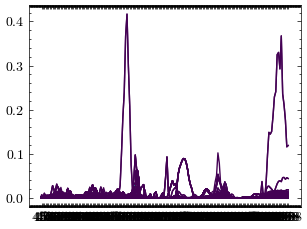

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Sample DataFrame
data = {
    'Wavelength': [400, 402, 404, 406, 408],
    'Effect': [18, 1.41, 1.51, 1.79, 2.24],
    '400': [2.81024e-09, 2.81024e-09, 2.81024e-09, 2.81024e-09, 2.81024e-09],
    '402': [2.0969e-09, 2.0969e-09, 2.0969e-09, 2.0969e-09, 2.0969e-09],
    '404': [2.11978e-09, 2.11978e-09, 2.11978e-09, 2.11978e-09, 2.11978e-09],
    '406': [1.76225e-09, 1.76225e-09, 1.76225e-09, 1.76225e-09, 1.76225e-09]
}

df = pd.DataFrame(data)

# Extract wavelengths and Effect values
# wavelengths = df.columns[2:].astype(float)
effect_values = spectra_tox['Effect value']

# Plot spectra with color mapping
fig, ax = plt.subplots()
cmap = plt.cm.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')

for i, row in spectra_tox.iloc[:, ::10].iterrows():
    # if len(row) == len(df.columns):  # Check if all columns are present in the row
    color = cmap(row['Effect value'] / max(effect_values))  # Map Effect value to color
    spectrum = row.iloc[1:].astype(float)
    wavelengths = row.iloc[1:].index
    ax.plot(wavelengths, spectrum, color=color, label=f'Effect: {row["Effect value"]}')

# Add colorbar
sm = ScalarMappable(cmap=cmap)
sm.set_array(effect_values)
cbar = plt.colorbar(sm)
cbar.set_label('Effect Values')

# Add labels and legend
ax.set_xlabel('Wavelength')
ax.set_ylabel('Intensity')
ax.set_title('Spectra with Colored Lines')
ax.legend()

plt.show()


In [ ]:
ir= spectra_tox.iloc[:, 1:]

<Axes: >

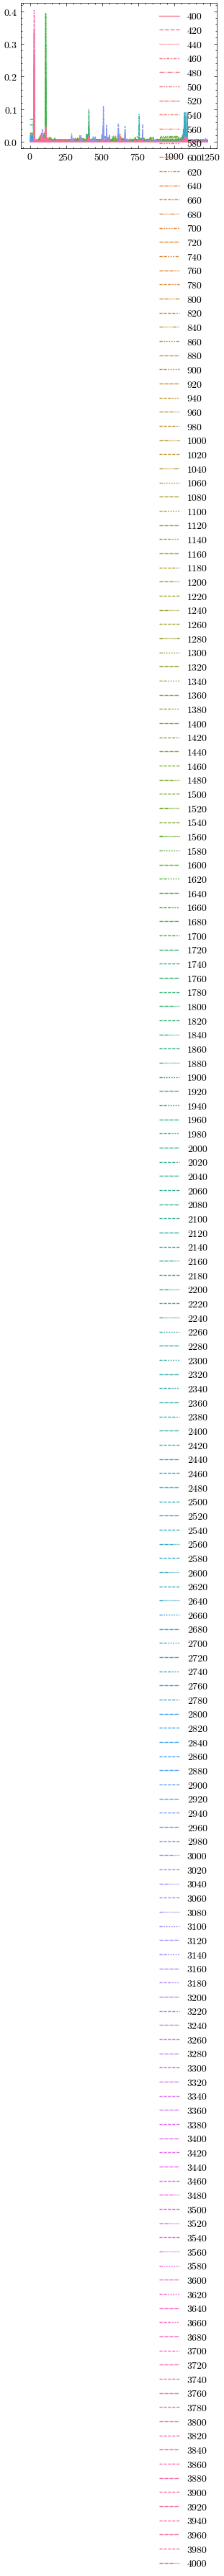

In [ ]:
sns.lineplot(ir.iloc[:, ::10])

In [ ]:
!pip3 -q install mapbox_vector_tile


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import mapbox_vector_tile
import json

with open('/Users/mikhailgasanov/Downloads/1253.mvt', 'rb') as f:
    data = f.read()
decoded_data = mapbox_vector_tile.decode(data)

sorted_data = json.dumps(decoded_data, indent=4, sort_keys=True)

# with open('0.json', 'w') as f:
#     f.write(sorted_data)

In [ ]:
example = pd.DataFrame({'lon':[1,2,3], 'lat':[2,3,5], 'data': ['a', 'b','c']})

In [ ]:
example.apply(lambda x: x['lon'] + x['lat'])

KeyError: 'lon'

In [ ]:
df.apply(lambda x: print(type)x['Effect']))

KeyError: 'Effect'

In [ ]:
import geopandas as gpd

In [ ]:
decoded_data.keys()

dict_keys(['water', 'boundary', 'landcover', 'waterway', 'landuse', 'transportation_name', 'place', 'water_name', 'transportation'])

In [ ]:
import requests
url = 'https://pvz-map-tile-server.wildberries.ru/OfficeOpenedApplication/12/2794/1250'

resp  = requests.get(url)

In [ ]:
mapbox_vector_tile.decode(resp.content)

{'OfficeOpenedApplication': {'extent': 4096,
  'version': 2,
  'features': [{'geometry': {'type': 'Point', 'coordinates': [2315, -9]},
    'properties': {'address': 'Россия, Тюмень, микрорайон Тарманы, Игримская улица, 26',
     'order_date': '2024-05-15 12:32:12.06774',
     'order_id': 19954},
    'id': 19954,
    'type': 'Feature'}],
  'type': 'FeatureCollection'}}